In [136]:
from dolfin import *

# Define mesh

In [137]:
N = 30
#mesh = UnitIntervalMesh(N)
mesh = UnitSquareMesh(N,N)

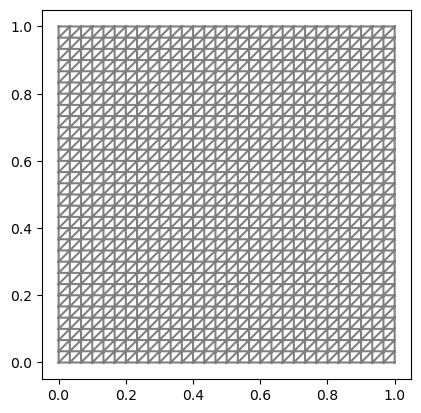

In [138]:
plot(mesh)

# Label subdomains and Interface

In [139]:
class Fluid(SubDomain):
    def inside(self, x, on_boundary):
        return x[0] <= 0.5

class Solid(SubDomain):
    def inside(self, x, on_boundary):
        return x[0] >= 0.5

class Interface(SubDomain):
    def inside(self, x, on_boundary):
        return x[0] == 0.5

fluid = Fluid()
solid = Solid()
interface = Interface()

sub_domains = MeshFunction("size_t", mesh, mesh.topology().dim())
sub_domains.set_all(0)
fluid.mark(sub_domains, 1)
solid.mark(sub_domains, 2)

boundaries = MeshFunction("size_t", mesh, mesh.topology().dim() - 1)
boundaries.set_all(0)
interface.mark(boundaries, 1)

In [140]:
sub_domains.array()
boundaries.array()

array([0, 0, 0, ..., 0, 0, 0], dtype=uint64)

# Define Function Spaces and Weak Variational Form

In [141]:
VE = FiniteElement("CG", mesh.ufl_cell(), 1)
V = FunctionSpace(mesh, MixedElement(VE, VE))
F = FunctionSpace(mesh, VE)
P = FunctionSpace(mesh, "CG", 1)

In [142]:
v = TrialFunction(V)
psi = TestFunction(V)
(w, z) = split(v)
(psiw, psiz) = split(psi)

Define a function $f$ that we want to approximate

In [143]:
fe = Expression("x[0]*x[1]", degree = 1)
f = project(fe, F)

In [144]:
dx = Measure('dx', domain=mesh, subdomain_data=sub_domains)
dS = Measure('dS', domain=mesh, subdomain_data=boundaries)
n = FacetNormal(mesh)

In [145]:
assemble( inner(n("-"), n("+"))*dS(1))

-1.0

In [146]:
with_iota = False #False/True
alpha = 1e-2

In [147]:
iota = interpolate(Constant(1.0), P)
if with_iota: # in this case iota is chosen as constantly one (= no iota)
    bc = DirichletBC(P, Constant(0.0), boundaries, 1)
    bc.apply(iota.vector())

In [148]:
a = inner(grad(w), grad(psiz))*dx(1) - inner(z, psiz)*dx(1) \
+ alpha * inner(grad(z), grad(psiw*iota))*dx(1) + inner(w, psiw)*dx(2) + alpha * inner(grad(z), grad(psiz *iota))*dx(2) \
+ alpha * (- inner(grad(z)("-"), iota("-") * psiw("-")* n("-"))*dS(1) - inner(grad(z)("+"), iota("+")*psiz("+")* n("+"))*dS(1))

In [149]:
L = inner(f, psiw)*dx(2)

In [150]:
v2 = Function(V)

In [151]:
solve(a == L, v2, [])

Solving linear variational problem.


In [152]:
(w2, z2) = split(v2)

Object cannot be plotted directly, projecting to piecewise linears.


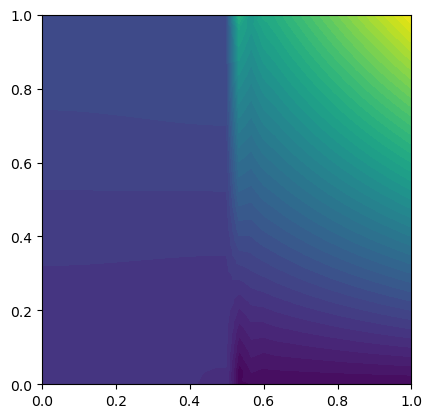

In [153]:
plot(w2)

In [154]:
w3, z3 = v2.split(deepcopy=True)

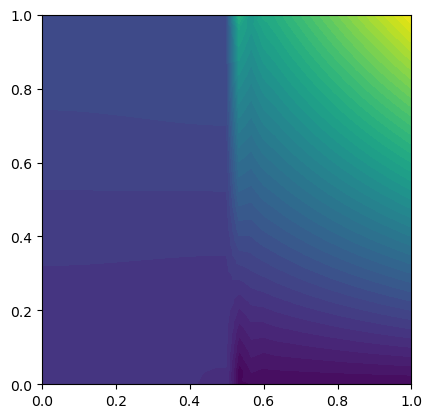

In [155]:
plot(w3)

In [156]:
w3.vector()[:]

array([ 2.12738129e-01,  2.12539066e-01,  2.12826015e-01,  2.11873091e-01,
        2.12606393e-01,  2.13018350e-01,  2.10757787e-01,  2.11934155e-01,
        2.12792811e-01,  2.13321869e-01,  2.09208875e-01,  2.10815381e-01,
        2.12113948e-01,  2.13093322e-01,  2.13733606e-01,  2.07245192e-01,
        2.09263249e-01,  2.10987973e-01,  2.12407444e-01,  2.13502348e-01,
        2.14245989e-01,  2.04889706e-01,  2.07296006e-01,  2.09427434e-01,
        2.11271338e-01,  2.12808347e-01,  2.14011705e-01,  2.14847899e-01,
        2.02169573e-01,  2.04936496e-01,  2.07450288e-01,  2.09697740e-01,
        2.11659297e-01,  2.13308146e-01,  2.14610147e-01,  2.15524687e-01,
        1.99115885e-01,  2.02211874e-01,  2.05079335e-01,  2.07704696e-01,
        2.10068310e-01,  2.12143396e-01,  2.13895550e-01,  2.15283044e-01,
        2.16257856e-01,  1.95763320e-01,  1.99153280e-01,  2.02341817e-01,
        2.05315161e-01,  2.08053741e-01,  2.10530976e-01,  2.12712508e-01,
        2.14556054e-01,  

In [157]:
assemble( inner(w3- f, w3-f)*dx(2))

0.00017328888252091416